# LIBRARIES IMPORT

In [1]:
# imports

import fig_lib 
import CNN_lib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models


# DATA GENERATOR

In [2]:
# -------- DATA PARAMS --------

generate_new_data=True
video_d=True                            # Video = True , Image = False 
    
n_recs_train,n_recs_eval=350,50
height, width = 100, 100
circles_filled=False
color=255

# -------- Video ---------

n_frames=[5,10]    # [min,max]
t_btw_frm=0.2

In [4]:
#input_d, eval_d

if generate_new_data:

    if video_d:
        
        input_d=fig_lib.vid_data_gen(height, width,n_recs_train,n_frames,'I',cir_f=circles_filled,color=color)
        eval_d=fig_lib.vid_data_gen(height, width,n_recs_eval,n_frames,'I',cir_f=circles_filled,color=color)

    else:

        input_d=fig_lib.im_data_gen(height, width,n_recs_train,'I',cir_f=circles_filled,color=color)
        eval_d=fig_lib.im_data_gen(height, width,n_recs_eval,'I',cir_f=circles_filled,color=color)

In [5]:
print('RECORD - LABEL - SHAPE')

if generate_new_data:
    
    for R in input_d.keys():
        print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE
I0 line (8, 100, 100) <class 'numpy.ndarray'>
I1 line (8, 100, 100) <class 'numpy.ndarray'>
I2 circle (8, 100, 100) <class 'numpy.ndarray'>
I3 line (8, 100, 100) <class 'numpy.ndarray'>
I4 circle (8, 100, 100) <class 'numpy.ndarray'>
I5 line (5, 100, 100) <class 'numpy.ndarray'>
I6 circle (8, 100, 100) <class 'numpy.ndarray'>
I7 circle (5, 100, 100) <class 'numpy.ndarray'>
I8 circle (9, 100, 100) <class 'numpy.ndarray'>
I9 line (9, 100, 100) <class 'numpy.ndarray'>
I10 circle (7, 100, 100) <class 'numpy.ndarray'>
I11 line (5, 100, 100) <class 'numpy.ndarray'>
I12 line (5, 100, 100) <class 'numpy.ndarray'>
I13 circle (5, 100, 100) <class 'numpy.ndarray'>
I14 circle (8, 100, 100) <class 'numpy.ndarray'>
I15 circle (6, 100, 100) <class 'numpy.ndarray'>
I16 circle (9, 100, 100) <class 'numpy.ndarray'>
I17 line (7, 100, 100) <class 'numpy.ndarray'>
I18 line (9, 100, 100) <class 'numpy.ndarray'>
I19 circle (7, 100, 100) <class 'numpy.ndarray'>
I20 line (9, 100, 100) <c

circle


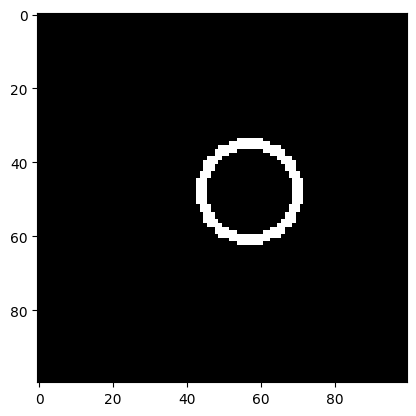

In [5]:
d_plt_check,rec_check=True,'I1'
print(input_d[rec_check]['label'])

if generate_new_data:

    if d_plt_check:

        if video_d:fig_lib.vid_show(input_d[rec_check]['image'],t_btw_frm=0.2)
        else:fig_lib.im_show(input_d[rec_check]['image'])


# CNN

### PARAMETERS

In [6]:
print('LIBRARY MODELS:')
print(' ')

for model_name in CNN_lib.MODELS.values(): print(model_name)

LIBRARY MODELS:
 
image_full_bin
image_conv_bin
image_conv_bin_augmentation


In [7]:
# -------- CNN PARAMS --------

# -------- MODEL --------

model_from_CNN_lib,mdl= False,'image_full_bin'

opt='adam'
lss='binary_crossentropy'

# -------- TRAINNING --------

epch=5


### GENERATE TRAIN DATA

In [8]:
# X_train,Y_train,X_eval,Y_eval

X_train,Y_train =CNN_lib.cnn_data_bin_gen(input_d,zero='circle', one= 'line')
X_eval,Y_eval = CNN_lib.cnn_data_bin_gen(eval_d,zero='circle', one= 'line')

print('Train data:',len(Y_train),'Evaluation data:',len(Y_eval))

Train data: 350 Evaluation data: 50


 Train data shape: (350, 100, 100)  Validation data shape: (50, 100, 100)


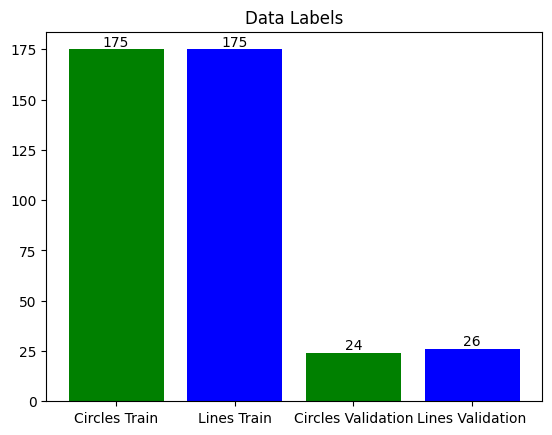

In [9]:
# check data

zeros_count = np.sum(Y_train == 0)
ones_count = np.sum(Y_train == 1)
zeros_count_val = np.sum(Y_eval == 0)
ones_count_val = np.sum(Y_eval == 1)

labels = ['Circles Train', 'Lines Train','Circles Validation', 'Lines Validation']
print(' Train data shape:', np.shape(X_train),' Validation data shape:', np.shape(X_eval))

plt.bar(labels, [zeros_count, ones_count,zeros_count_val,ones_count_val], color=['green', 'blue','green', 'blue'])

for i, count in enumerate([zeros_count, ones_count,zeros_count_val,ones_count_val]):

    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Data Labels')
plt.show()

### MODEL

In [10]:
# MODEL 

if model_from_CNN_lib:
  
  model=CNN_lib.lib_models(mdl,im_input_shp=(height, width))

else:


  data_augmentation = keras.Sequential([
                      layers.RandomFlip("horizontal",input_shape=(height, width, 1)),
                      layers.RandomRotation(0.1),
                      layers.RandomZoom(0.1),])
                            
  model = models.Sequential([
                            data_augmentation,
                            layers.Rescaling(1./255),
                            layers.Conv2D(32, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Dropout(0.2),
                            layers.Flatten(),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1, activation='sigmoid'),
                            ])

  
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 1)       0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                 

In [11]:
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])

### TRAINNING

In [12]:
history =model.fit(X_train, Y_train, epochs=epch, validation_data=(X_eval,Y_eval))

Epoch 1/5
11/11 [==============================] - 3s 130ms/step - loss: 0.6220 - accuracy: 0.6114 - val_loss: 0.5461 - val_accuracy: 0.7400
Epoch 2/5
11/11 [==============================] - 1s 124ms/step - loss: 0.4934 - accuracy: 0.7886 - val_loss: 0.4056 - val_accuracy: 0.8400
Epoch 3/5
11/11 [==============================] - 1s 119ms/step - loss: 0.3711 - accuracy: 0.8514 - val_loss: 0.4309 - val_accuracy: 0.8600
Epoch 4/5
11/11 [==============================] - 1s 119ms/step - loss: 0.3251 - accuracy: 0.8743 - val_loss: 0.2459 - val_accuracy: 0.8600
Epoch 5/5
11/11 [==============================] - 1s 129ms/step - loss: 0.2671 - accuracy: 0.8886 - val_loss: 0.1175 - val_accuracy: 0.9600


### EVALUATE MODEL

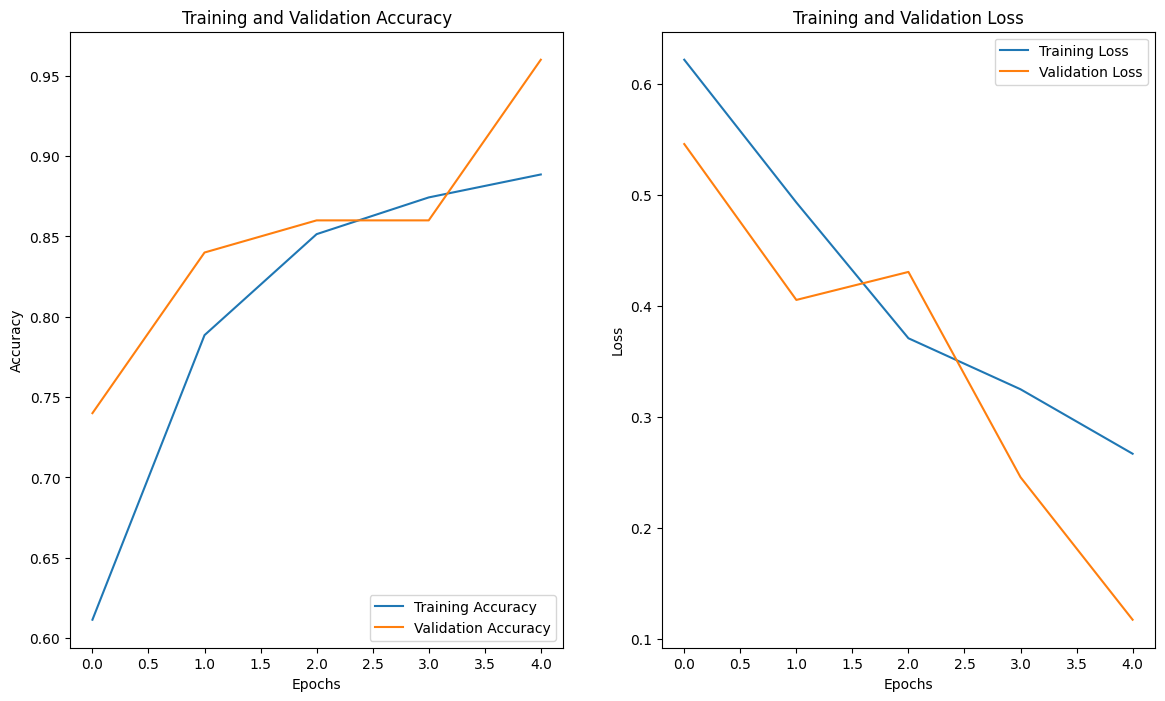

In [13]:
fg_size=(14,8)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epch)

plt.figure(figsize=fg_size)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

2/2 - 0s - loss: 0.1175 - accuracy: 0.9600 - 48ms/epoch - 24ms/step
Loss: 0.11751586198806763 Accuracy: 0.9599999785423279


### FORECAST

GENERATE RANDOM IMAGE

In [17]:
# generate random im

n_rdm=np.random.rand()

if video_d:
    
    if n_rdm>=0.5:
        
        pass
    
    else:

        pass

else:

    if n_rdm>=0.5:

        p1=[np.random.randint(0, width-1),np.random.randint(0, height-1)]
        p2=[np.random.randint(0, width-1),np.random.randint(0, height-1)]
        image=fig_lib.line_im(p1,p2,height=height, width=width,thickness=(1,3),color=color)
        label='Line'

    else:
        
        center= [np.random.randint(int(0+width*0.3), int(width - width*0.3)),np.random.randint(int(0+height*0.3), int(height-height*0.3))]
        radio = np.random.randint(12, 17)
        image=fig_lib.circle_im(center,radio,height=height, width=width,thickness=(1,3),color=color,filled=circles_filled)
        label= 'circle'

1/1 - 0s - 21ms/epoch - 21ms/step
Real: circle ----> Forecast: circle
Percentage: 99.86000000499189 %
 


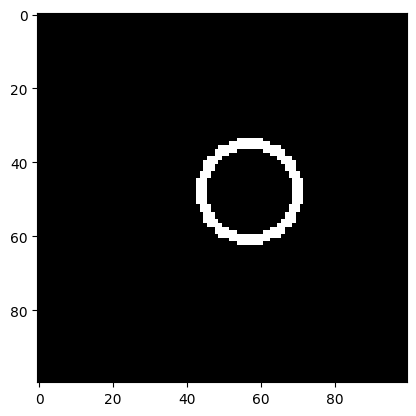

In [18]:
# Forecast

pred = model.predict(np.expand_dims(image, axis=0),verbose=2)
CNN_lib.bin_forecast(pred,label=label,up_frc='line',down_frc='circle')


if video_d:pass
else:fig_lib.im_show(input_d[rec_check]['image'])
